# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends

1. Collecting weather data from 559 random and diverse cities around the world using the OpenWeatherMap API,the data illustrated maximum temperature(in Fahrenheit),humidity(%),cloudiness(%)and wind speed(in mph)with the corresponding city,and with respect to the geo-coordinate,Latitude.
2. This data on temperature is the result of seasons and the tilt of the Earth's axis compared to the plane of its revolution around the Sun. Throughout the year the northern and southern hemispheres are alternately turned either toward or away from the sun depending on Earth's position in its orbit. The hemisphere turned toward the sun receives more sunlight and is in summer, while the other hemisphere receives less sun and is in winter.
3. There seems to be little to no correlation between humidity and Latitude as well as with cloudiness and Latitude. The scatter plot visualizations display a considerable amount of heterogeneity even at similar Latitudes. Basically, they're all over the map. However, a small grouping of cities exhibited abnormally low humity levels (at 0% humidity) in the Northern Hemisphere at around 60° to 75° Latitude.
4. Finally, wind speeds increase in the upper and lower halves on the hemisphere, especially in the north (around 60° to 70° Latitude), and do not go above 25mph within 30° of the Equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

!pip install citipy

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create url
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -37.64,
        "lat": 65.61
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 30.2,
        "feels_like": 23.4,
        "temp_min": 30.2,
        "temp_max": 30.2,
        "pressure": 1005,
        "humidity": 68
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.36,
        "deg": 200
    },
    "clouds": {
        "all": 93
    },
    "dt": 1604801028,
    "sys": {
        "type": 1,
        "id": 81,
        "country": "GL",
        "sunrise": 1604745952,
        "sunset": 1604770963
    },
    "timezone": -10800,
    "id": 3424607,
    "name": "Tasiilaq",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Barrow
City not found. Skipping...
Processing Record 2 | Guérande
Processing Record 3 | Ushuaia
Processing Record 4 | George Town
Processing Record 5 | Prince Rupert
Processing Record 6 | Punta Arenas
Processing Record 7 | Lompoc
Processing Record 8 | Illapel
Processing Record 9 | Mar del Plata
Processing Record 10 | Faanui
Processing Record 11 | Saint-François
Processing Record 12 | Pittsburg
Processing Record 13 | Cape Town
Processing Record 14 | Jamestown
Processing Record 15 | Naze
Processing Record 16 | Bluff
Processing Record 17 | Vaini
Processing Record 18 | Necochea
Processing Record 19 | Busselton
City not found. Skipping...
Processing Record 20 | Arraial do Cabo
Processing Record 21 | Albany
Processing Record 22 | Avarua
Processing Record 23 | Hamilton
Processing Record 24 | Sainte-Thècle
Processing Record 25 | Port Alfred
Processing Record 26 | Itaituba
Processing Record 27 | Azuaga
Processing Rec

City not found. Skipping...
Processing Record 230 | Innisfail
Processing Record 231 | Sturgeon Bay
Processing Record 232 | Port Lincoln
Processing Record 233 | Tuy Hoa
Processing Record 234 | Nizwá
Processing Record 235 | Laas
City not found. Skipping...
Processing Record 236 | Palmer
City not found. Skipping...
Processing Record 237 | Paranaguá
Processing Record 238 | Linxia Chengguanzhen
City not found. Skipping...
Processing Record 239 | Kyren
Processing Record 240 | Nanga Eboko
Processing Record 241 | Horsham
Processing Record 242 | Rome
Processing Record 243 | Houma
Processing Record 244 | Severo-Kuril'sk
Processing Record 245 | Turukhansk
Processing Record 246 | Santa Cruz de La Palma
Processing Record 247 | Tete
Processing Record 248 | Tual
Processing Record 249 | Puerto Colombia
Processing Record 250 | Sterling
Processing Record 251 | Srednekolymsk
Processing Record 252 | Balta
Processing Record 253 | Baryatino
Processing Record 254 | Pachperwa
Processing Record 255 | Batī
Proc

Processing Record 463 | Ringe
Processing Record 464 | Balyqshy
Processing Record 465 | Toktogul
Processing Record 466 | Ruteng
Processing Record 467 | Qaqortoq
Processing Record 468 | São Filipe
Processing Record 469 | Nhulunbuy
Processing Record 470 | Östersund
Processing Record 471 | Parrita
City not found. Skipping...
Processing Record 472 | Bireun
Processing Record 473 | Todos Santos
Processing Record 474 | Tambura
Processing Record 475 | Chirongui
Processing Record 476 | Bentiu
City not found. Skipping...
Processing Record 477 | Sirte
Processing Record 478 | Boende
Processing Record 479 | Dunedin
Processing Record 480 | Bubaque
Processing Record 481 | Aubenas
Processing Record 482 | Lázaro Cárdenas
Processing Record 483 | Onega
Processing Record 484 | Media Luna
Processing Record 485 | Sapucaí
Processing Record 486 | Urmia
Processing Record 487 | Channel-Port aux Basques
Processing Record 488 | Tura
Processing Record 489 | Uvinza
Processing Record 490 | Enterprise
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               572
Country            572
Date               572
Latitude           572
Longitude          572
Max Temperature    572
Humidity           572
Cloudiness         572
Wind Speed         572
dtype: int64

In [7]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1604801029,71.29,-156.79,30.2,92,90,23.04
1,Guérande,FR,1604801030,47.33,-2.43,59.0,93,90,3.36
2,Ushuaia,AR,1604800886,-54.80,-68.30,57.2,44,20,14.99
3,George Town,MY,1604801030,5.41,100.34,82.4,83,20,4.70
4,Prince Rupert,CA,1604801030,54.32,-130.32,42.8,64,1,6.93


In [14]:
weather_data.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.604801e+09,22.977028,17.802395,56.139266,74.323427,47.347902,7.760070
std,1.997815e+02,32.837143,89.448190,22.533229,19.325816,40.517056,6.001619
min,1.604800e+09,-54.800000,-179.170000,-14.670000,10.000000,0.000000,0.290000
25%,1.604801e+09,-3.762500,-59.235000,40.712500,63.000000,1.000000,3.360000
50%,1.604801e+09,29.650000,23.440000,60.405000,79.000000,41.000000,5.990000
75%,1.604801e+09,50.147500,95.732500,75.010000,89.000000,90.000000,10.405000
max,1.604801e+09,78.220000,179.320000,96.800000,100.000000,100.000000,36.910000


In [19]:
#Remove cities where Humidity > 100%
humid_cities = weather_data["City"].loc[weather_data["Humidity"] > 100].count()
if humid_cities > 0:
    weather_data = city_df.loc[weather_data["Humidity"] <= 100]
weather_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1604801029,71.29,-156.79,30.20,92,90,23.04
1,Guérande,FR,1604801030,47.33,-2.43,59.00,93,90,3.36
2,Ushuaia,AR,1604800886,-54.80,-68.30,57.20,44,20,14.99
3,George Town,MY,1604801030,5.41,100.34,82.40,83,20,4.70
4,Prince Rupert,CA,1604801030,54.32,-130.32,42.80,64,1,6.93
...,...,...,...,...,...,...,...,...,...
567,Portland,US,1604800404,45.52,-122.68,43.00,87,99,1.99
568,Malanje,AO,1604800910,-9.54,16.34,65.89,99,100,4.88
569,Olafsvik,IS,1604800672,64.89,-23.71,39.85,72,30,24.25
570,Okha,RU,1604800788,53.57,142.95,27.55,89,100,13.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

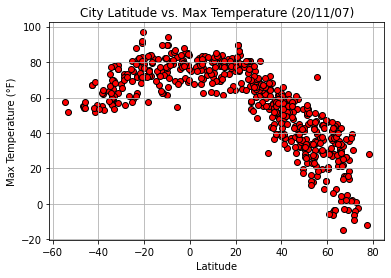

In [40]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


#### Latitude vs. Humidity Plot

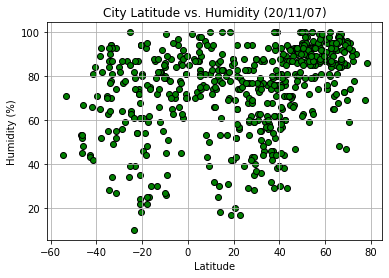

In [38]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

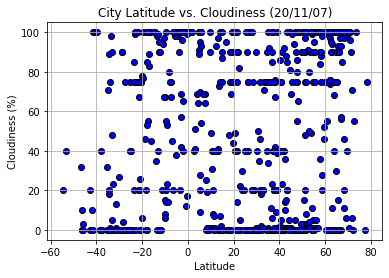

In [37]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

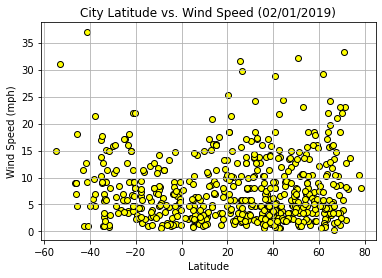

In [23]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

#  Linear Regression

In [12]:
# dependencies
import scipy.stats as st

# Create data frame for northern and southern hemispheres

In [15]:
# northern hemisphere data frame
north_df = weather_data[weather_data["Latitude"] >= 0]
north_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1604801029,71.29,-156.79,30.20,92,90,23.04
1,Guérande,FR,1604801030,47.33,-2.43,59.00,93,90,3.36
3,George Town,MY,1604801030,5.41,100.34,82.40,83,20,4.70
4,Prince Rupert,CA,1604801030,54.32,-130.32,42.80,64,1,6.93
6,Lompoc,US,1604800488,34.64,-120.46,53.60,76,40,8.05
...,...,...,...,...,...,...,...,...,...
565,Sioux Lookout,CA,1604800697,50.10,-91.92,32.00,93,90,6.93
566,Raudeberg,NO,1604801146,61.99,5.14,46.40,100,100,5.82
567,Portland,US,1604800404,45.52,-122.68,43.00,87,99,1.99
569,Olafsvik,IS,1604800672,64.89,-23.71,39.85,72,30,24.25


In [18]:
# southern hemisphere data frame
south_df = weather_data[weather_data["Latitude"] < 0]
south_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
2,Ushuaia,AR,1604800886,-54.80,-68.30,57.20,44,20,14.99
5,Punta Arenas,CL,1604800433,-53.15,-70.92,51.80,71,40,31.09
7,Illapel,CL,1604801031,-31.63,-71.17,56.89,74,0,0.85
8,Mar del Plata,AR,1604800977,-38.00,-57.56,62.01,93,40,4.70
9,Faanui,PF,1604801031,-16.48,-151.75,79.45,75,100,10.94
...,...,...,...,...,...,...,...,...,...
560,Bukama,CD,1604801145,-9.20,25.85,70.79,89,23,0.65
561,Saint-Paul,RE,1604801145,-21.01,55.27,71.60,68,75,11.41
563,Vanimo,PG,1604801145,-2.67,141.30,77.86,85,100,4.76
568,Malanje,AO,1604800910,-9.54,16.34,65.89,99,100,4.88


# Northern Hemisphere - Max Temperature vs Latitude

In [24]:
north_x_lat = north_df["Latitude"]
north_y_temp = north_df["Max Temperature"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {round(n_temp.rvalue,2)}")

correlation coefficient: -0.86
The r-value is -0.86


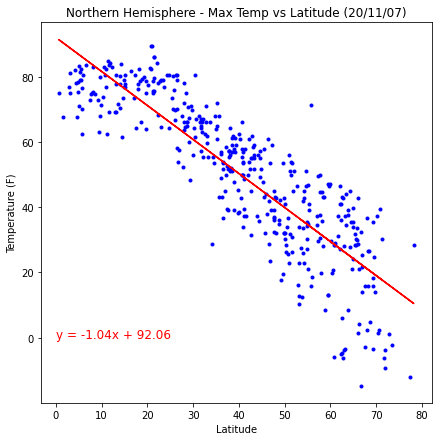

In [41]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("../Images/North_lat_temp.png")
plt.savefig(file)

# Southern Hemisphere - Max Temperature vs Latitude

In [42]:
south_x_lat = south_df["Latitude"]
south_y_temp = south_df["Max Temperature"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")

correlation coefficient: 0.64
The r-value is 0.6388546079135501


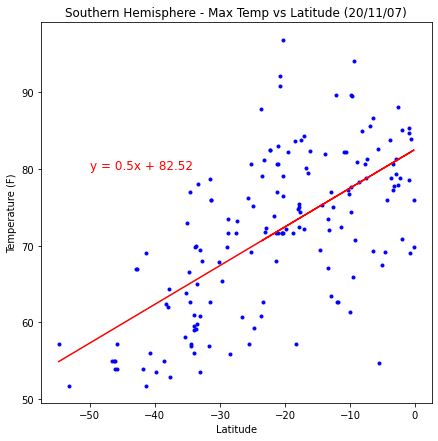

In [43]:
#create equation of line
line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope,2)}x + {round(s_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("../Images/South_lat_temp.png")
plt.savefig(file)

# Northern Hemisphere - Humidity (%) vs Latitude